In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [2]:
df_asli = pd.read_csv('dataset.csv')
df = df_asli.copy()

In [4]:
def label (revenue):
    if revenue == True:
        return 0
    else:
        return 1
    
df['Rev']=df['Revenue'].apply(label)

In [5]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Rev
11377,0.0,0.000000,0,0.0,33,1996.816667,0.000000,0.006250,44.064914,0.0,Nov,4.0,2,6,2,Returning_Visitor,False,True,0
615,0.0,0.000000,0,0.0,11,125.000000,0.018182,0.081818,0.000000,0.0,Mar,2.0,2,1,13,Returning_Visitor,False,False,1
12881,0.0,0.000000,0,0.0,7,296.766667,0.000000,0.000000,0.000000,0.0,Aug,1.0,8,7,3,Returning_Visitor,False,False,1
6956,4.0,659.506667,3,92.7,160,2006.593120,0.002454,0.013361,9.453449,0.0,Aug,2.0,2,7,2,Returning_Visitor,False,False,1
4028,0.0,0.000000,0,0.0,4,206.500000,0.000000,0.016667,0.000000,0.0,May,3.0,2,1,4,Returning_Visitor,False,False,1


# Missing Value

In [6]:
df['Administrative'] = df['Administrative'].fillna(value=df['Administrative'].median())
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(value=df['Administrative_Duration'].median())
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(value=df['ProductRelated_Duration'].median())
df['BounceRates'] = df['BounceRates'].fillna(value=df['BounceRates'].median())

In [7]:
df = df.dropna(subset=['OperatingSystems'])

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.Region = df.Region.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Batam', 'Makassar', 'Tangerang', 'Yogyakarta', 'Semarang'])

df.Browser = df.Browser.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                                ['Safari', 'Google Chrome', 'Internet Explorer', 'Mozilla Firefox', 'Microsoft Edge', 'Samsung Internet', 'Maxthon Browser', 'Brave', 'Vivaldi', 'UC Browser', 'DuckDuckGo', 'Opera', 'Netscape Navigator'])

df.OperatingSystems = df.OperatingSystems.astype('string').replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'],
                                                  ['iOS', 'Windows', 'Android', 'MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux'])

df.TrafficType = df.TrafficType.astype('string').replace(['1', '2', '3', '4', '5', '6', '8', '10', '13'],
                                        ['Organic Search', 'Paid Search', 'Direct Traffic', 'Social Media', 'Facebook Ads', 'Referral Traffic', 'Email Marketing ', 'Display Advertising', 'Affiliate Marketing'])

In [10]:
df = df.drop(df.loc[df['VisitorType'] =='Other'].index) 

In [11]:
os_replace = ['MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux']
browser_replace =  ['Maxthon Browser', 'Vivaldi', 'DuckDuckGo', 'Opera', 'Netscape Navigator']
traffic_replace = ['9','7','12','14','15','16','17','18','19']

In [12]:
df['OperatingSystems'] = df['OperatingSystems'].astype('string').replace(to_replace=os_replace,value='other')
df['Browser'] = df['Browser'].astype('string').replace(to_replace=browser_replace,value='other')
df['TrafficType'] = df['TrafficType'].astype('string').replace(to_replace=traffic_replace,value='other')

In [13]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Month']
df = pd.get_dummies(df, columns=columns_to_encode)

In [14]:
outlier = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
           'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates',
           'PageValues']

In [15]:
for num in df[outlier]:
    min_value = df[df[num] > 0][num].min() / 2
    df[num] = np.log(df[num] + min_value)

In [16]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore = df[filtered_entries] 
df = df_zscore
print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier: 11649
Jumlah baris setelah memfilter outlier: 10719


In [17]:
df['Avg_Duration'] = df['ProductRelated_Duration']/df['ProductRelated']
df['Inf_Duration'] = df["Informational_Duration"]/df['Informational']
df['Admin_Duration']=df['Administrative_Duration']/df['Administrative']

In [18]:
df.drop(columns=['Administrative_Duration'], inplace=True)
df.drop(columns=['Informational_Duration'], inplace=True)
df.drop(columns=['ProductRelated_Duration'], inplace=True)
df.drop(columns=['SpecialDay'], inplace =True)
df.drop(columns=['PageValues'], inplace=True)

In [19]:
df.keys()

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'ExitRates', 'Revenue', 'Rev', 'OperatingSystems_Android',
       'OperatingSystems_Windows', 'OperatingSystems_iOS',
       'OperatingSystems_other', 'Browser_Brave', 'Browser_Google Chrome',
       'Browser_Internet Explorer', 'Browser_Microsoft Edge',
       'Browser_Mozilla Firefox', 'Browser_Safari', 'Browser_Samsung Internet',
       'Browser_UC Browser', 'Browser_other', 'Region_Bandung', 'Region_Batam',
       'Region_Jakarta', 'Region_Makassar', 'Region_Medan', 'Region_Semarang',
       'Region_Surabaya', 'Region_Tangerang', 'Region_Yogyakarta',
       'TrafficType_11', 'TrafficType_20', 'TrafficType_Affiliate Marketing',
       'TrafficType_Direct Traffic', 'TrafficType_Display Advertising',
       'TrafficType_Email Marketing ', 'TrafficType_Facebook Ads',
       'TrafficType_Organic Search', 'TrafficType_Paid Search',
       'TrafficType_Referral Traffic', 'TrafficType_Social Media',
       'T

In [21]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Revenue','Rev'])
y= df['Rev']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8575, 56)
X_test shape: (2144, 56)
y_train shape: (8575,)
y_test shape: (2144,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_res))


Original dataset shape: Counter({1: 7230, 0: 1345})
Resampled dataset shape: Counter({1: 7230, 0: 7230})


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

def metrics(y_test, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    tpr_recall = recall_score(y_test, y_pred)
    fpr = fp / (fp + tn)
    tnr_specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    print(f"Accuracy = {accuracy}")
    print(f"Error Rate = {error_rate}")
    print(f"True Positive Rate (Recall) = {tpr_recall}")
    print(f"False Positive Rate = {fpr}")
    print(f"True Negative Rate (Specificity) = {tnr_specificity}")
    print(f"Precision = {precision}")
    print(f"F1Score = {f1score}")


In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
cdt_classifier = DecisionTreeClassifier(random_state=42)
cdt_classifier.fit(X_res, y_res)
y_pred1 = cdt_classifier.predict(X_test_scaled)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_res, y_res)
y_pred2 = rf_classifier.predict(X_test_scaled)

In [28]:
import xgboost as xgb
XGboost = xgb.XGBClassifier()
XGboost.fit(X_res, y_res)
y_pred4 = XGboost.predict(X_test_scaled)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_res, y_res)
y_pred_AB = adaboost_classifier.predict(X_test_scaled)

In [39]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier() 
lgb.fit(X_res, y_res) 
ypred_LGB = lgb.predict(X_test_scaled)

ModuleNotFoundError: No module named 'lightgbm'

In [36]:
print("Model: Decision Tree Classifier")
metrics(y_test, y_pred1)
print("-" * 40) 
print("Model: RandomForest Classifier Original")
metrics(y_test, y_pred2)
print("-" * 40)
print("Model: XGBoost Classifier")
metrics(y_test, y_pred4)
print("-" * 40)
print("Model: ADABoost Classifier")
metrics(y_test, y_pred_AB)

Model: Decision Tree Classifier
Accuracy = 0.7397388059701493
Error Rate = 0.2602611940298507
True Positive Rate (Recall) = 0.8319280494659921
False Positive Rate = 0.7095890410958904
True Negative Rate (Specificity) = 0.29041095890410956
Precision = 0.851063829787234
F1Score = 0.8413871517907903
----------------------------------------
Model: RandomForest Classifier Original
Accuracy = 0.8078358208955224
Error Rate = 0.19216417910447758
True Positive Rate (Recall) = 0.924114671163575
False Positive Rate = 0.7589041095890411
True Negative Rate (Specificity) = 0.2410958904109589
Precision = 0.855804268610099
F1Score = 0.8886486486486487
----------------------------------------
Model: XGBoost Classifier
Accuracy = 0.820429104477612
Error Rate = 0.17957089552238803
True Positive Rate (Recall) = 0.9432265317594154
False Positive Rate = 0.7780821917808219
True Negative Rate (Specificity) = 0.2219178082191781
Precision = 0.855249745158002
F1Score = 0.8970863405506548
------------------------

In [30]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

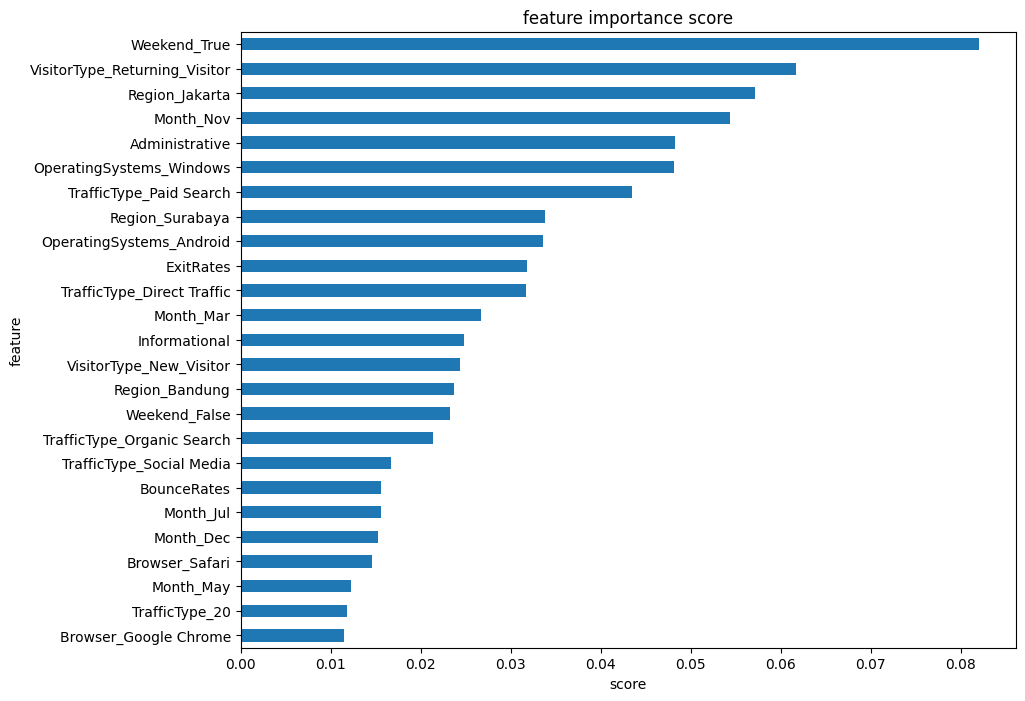

In [34]:
show_feature_importance(XGboost)

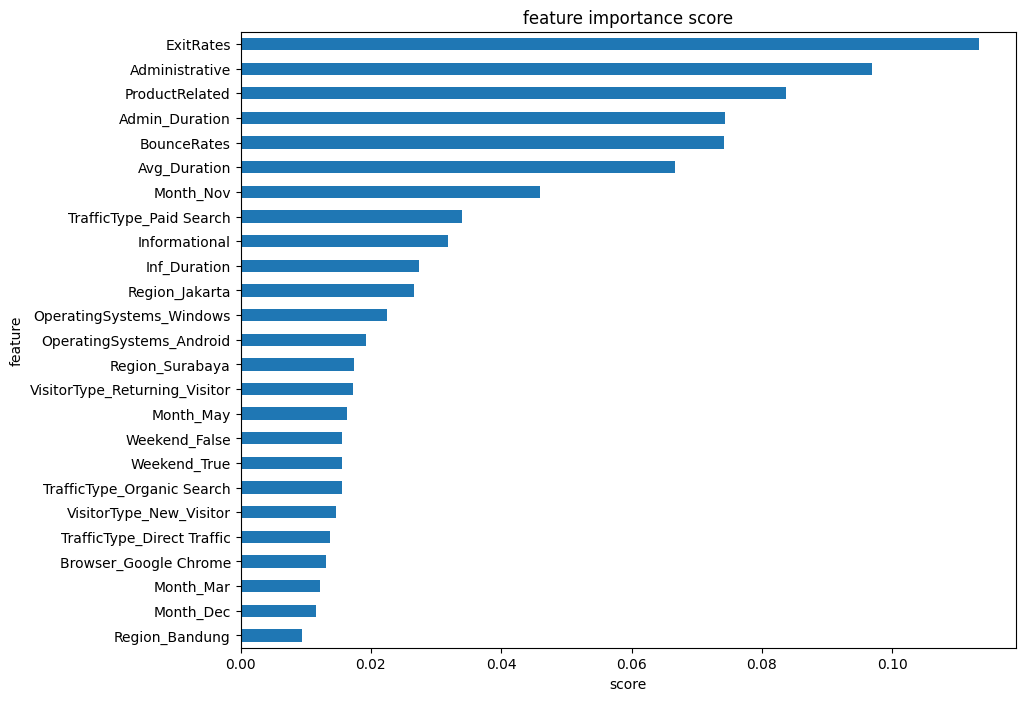

In [33]:
show_feature_importance(rf_classifier)

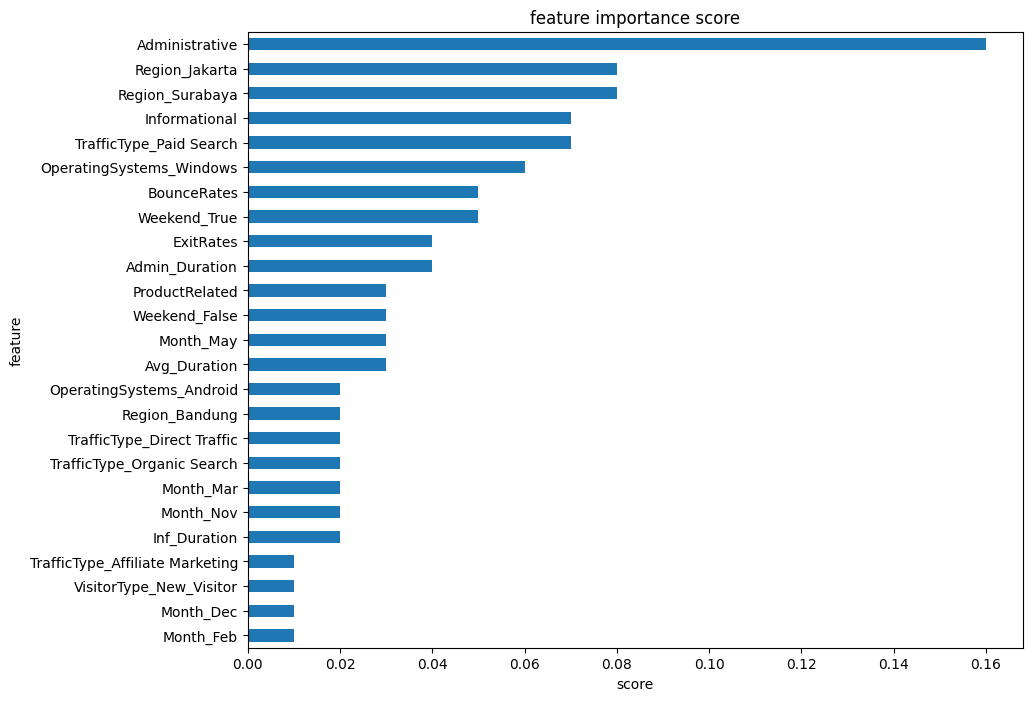

In [37]:
show_feature_importance(adaboost_classifier)